# 4. Статистический анализ данных

### 1. Среднее значение,  медиана, мода и диапазон

### 1.1

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ekb_weather.csv')

print(df.head(10))
print(df.describe())

               date  temp  pressure  humidity
0  31.12.2019 23:00  -9.2     743.1        76
1  31.12.2019 20:00  -8.8     744.1        75
2  31.12.2019 17:00  -7.9     744.5        82
3  31.12.2019 14:00 -11.5     745.9        85
4  31.12.2019 11:00 -12.8     749.0        84
5  31.12.2019 08:00 -15.3     752.8        83
6  31.12.2019 05:00 -18.4     757.6        80
7  31.12.2019 02:00 -20.9     761.5        79
8  30.12.2019 23:00 -21.4     764.2        78
9  30.12.2019 20:00 -20.9     766.8        79
              temp     pressure     humidity
count  2919.000000  2918.000000  2919.000000
mean      3.953923   761.434133    66.257965
std      11.908801     8.133222    17.755583
min     -31.800000   735.000000    13.000000
25%      -5.200000   756.100000    55.000000
50%       3.900000   761.200000    72.000000
75%      13.500000   766.900000    80.000000
max      33.600000   787.600000    93.000000


### 1.2

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ekb_weather.csv')
df['date'] = pd.to_datetime(df['date'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2919 non-null   datetime64[ns]
 1   temp      2919 non-null   float64       
 2   pressure  2918 non-null   float64       
 3   humidity  2919 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 91.3 KB
None


### 1.3 

In [97]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ekb_weather.csv')
months = {1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль', 8:'Август', 9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'}

df['date'] = pd.to_datetime(df['date'])
df['month'] = pd.DatetimeIndex(df['date']).month

#Использование собственной функции
df['month'] = df['month'].apply(lambda i: months[i])

df.to_csv('new_ekb_weather.csv')

print(df)


#Использование встроенных методов
#df['date'] = pd.to_datetime(df['date'])
#df['month'] = df['date'].dt.month
#df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name()
#print(df)

#df['date'] = pd.to_datetime(df['date'])
#df["month"] = pd.to_datetime(df["Date"]).dt.month
#df["month"] = pd.to_datetime(df["date"]).dt.strftime("%B")






                    date  temp  pressure  humidity    month
0    2019-12-31 23:00:00  -9.2     743.1        76  Декабрь
1    2019-12-31 20:00:00  -8.8     744.1        75  Декабрь
2    2019-12-31 17:00:00  -7.9     744.5        82  Декабрь
3    2019-12-31 14:00:00 -11.5     745.9        85  Декабрь
4    2019-12-31 11:00:00 -12.8     749.0        84  Декабрь
...                  ...   ...       ...       ...      ...
2914 2019-01-01 14:00:00 -10.6     770.8        71   Январь
2915 2019-01-01 11:00:00 -11.9     771.3        75   Январь
2916 2019-01-01 08:00:00 -12.8     770.9        75   Январь
2917 2019-01-01 05:00:00 -12.8     770.9        75   Январь
2918 2019-01-01 02:00:00 -11.8     770.6        75   Январь

[2919 rows x 5 columns]


### 1.4

In [98]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('new_ekb_weather.csv')
df = df.drop('Unnamed: 0', axis=1)
df['date'] = pd.to_datetime(df['date'])
print(df)


                    date  temp  pressure  humidity    month
0    2019-12-31 23:00:00  -9.2     743.1        76  Декабрь
1    2019-12-31 20:00:00  -8.8     744.1        75  Декабрь
2    2019-12-31 17:00:00  -7.9     744.5        82  Декабрь
3    2019-12-31 14:00:00 -11.5     745.9        85  Декабрь
4    2019-12-31 11:00:00 -12.8     749.0        84  Декабрь
...                  ...   ...       ...       ...      ...
2914 2019-01-01 14:00:00 -10.6     770.8        71   Январь
2915 2019-01-01 11:00:00 -11.9     771.3        75   Январь
2916 2019-01-01 08:00:00 -12.8     770.9        75   Январь
2917 2019-01-01 05:00:00 -12.8     770.9        75   Январь
2918 2019-01-01 02:00:00 -11.8     770.6        75   Январь

[2919 rows x 5 columns]


In [99]:
from calendar import month


mean_month_group = df.groupby('month').mean(numeric_only = True)
print(mean_month_group)


               temp    pressure   humidity
month                                     
Август    11.248387  761.472984  69.967742
Апрель     2.530000  762.376250  57.258333
Декабрь   -2.381855  763.216532  71.000000
Июль      14.629435  757.202419  61.084677
Июнь      11.288703  759.383682  59.364017
Май        8.328629  761.002016  58.560484
Март       1.411290  761.793117  65.790323
Ноябрь    -1.612083  770.042083  70.029167
Октябрь    3.963710  761.418548  72.286290
Сентябрь   6.235833  759.481667  69.566667
Февраль   -2.512946  757.710268  68.830357
Январь    -6.193548  761.921774  71.294355


In [100]:
if mean_month_group.loc['Январь','temp'] < mean_month_group.loc['Декабрь','temp']:
    print("Январь", '\n')
else:
    print("Декабрь", '\n')


Январь 



In [101]:
if mean_month_group.loc["Апрель",'pressure'] > mean_month_group.loc["Ноябрь",'pressure']:
    print("Апрель", '\n')
else:
    print("Ноябрь", '\n')

Ноябрь 



In [102]:
if mean_month_group.loc["Июнь",'humidity'] > mean_month_group.loc["Август",'humidity']:
    print("Июнь", '\n')
else:
    print("Август", '\n')


Август 



### 1.5

In [117]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

df = df.groupby('month')['temp'].agg([np.mean, np.median, stats.mode])
print(df)

               mean  median           mode
month                                     
Август    11.248387   13.40  ([14.6], [5])
Апрель     2.530000    3.25   ([5.4], [4])
Декабрь   -2.381855   -5.40  ([-4.9], [6])
Июль      14.629435   16.95  ([15.3], [4])
Июнь      11.288703   13.60  ([13.6], [5])
Май        8.328629    9.55  ([10.9], [5])
Март       1.411290    0.70   ([0.7], [6])
Ноябрь    -1.612083   -4.25  ([-1.4], [5])
Октябрь    3.963710    3.20  ([-0.2], [5])
Сентябрь   6.235833    5.85   ([2.2], [7])
Февраль   -2.512946   -5.45  ([-5.1], [8])
Январь    -6.193548   -7.75  ([-7.7], [6])


c:\Users\KFM\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\groupby\groupby.py:1476: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  f = lambda x: func(x, *args, **kwargs)


In [119]:
df = df.reset_index(level='month')

       month       mean  median           mode
0     Август  11.248387   13.40  ([14.6], [5])
1     Апрель   2.530000    3.25   ([5.4], [4])
2    Декабрь  -2.381855   -5.40  ([-4.9], [6])
3       Июль  14.629435   16.95  ([15.3], [4])
4       Июнь  11.288703   13.60  ([13.6], [5])
5        Май   8.328629    9.55  ([10.9], [5])
6       Март   1.411290    0.70   ([0.7], [6])
7     Ноябрь  -1.612083   -4.25  ([-1.4], [5])
8    Октябрь   3.963710    3.20  ([-0.2], [5])
9   Сентябрь   6.235833    5.85   ([2.2], [7])
10   Февраль  -2.512946   -5.45  ([-5.1], [8])
11    Январь  -6.193548   -7.75  ([-7.7], [6])


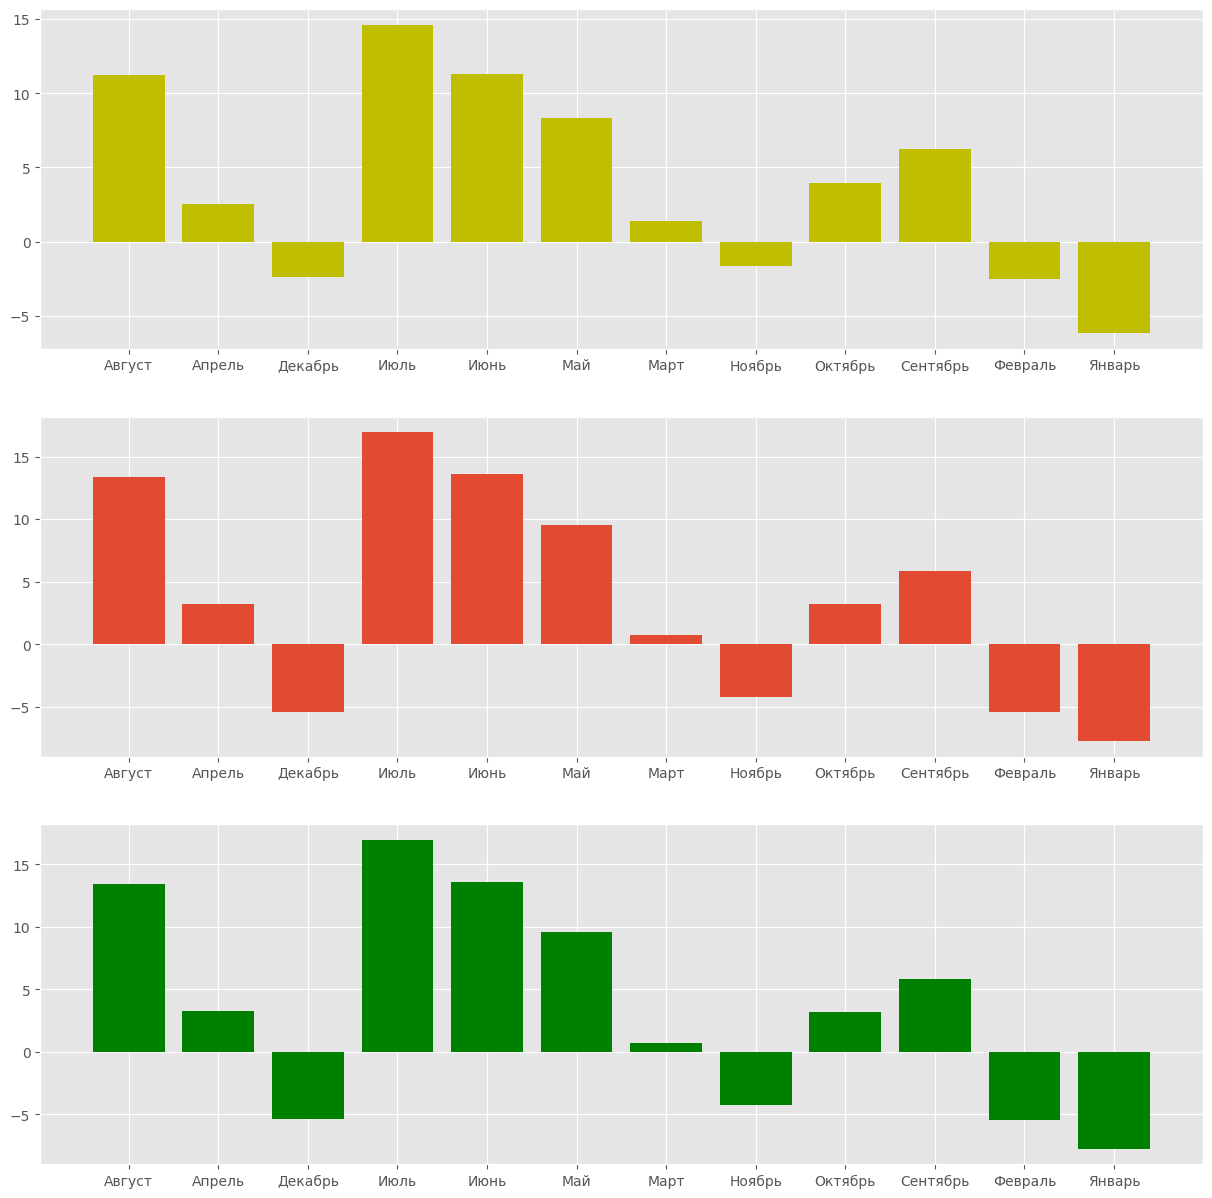

In [145]:
print(df)

fig, (ax1,ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (15,15))

ax1.bar(df['month'], df['mean'], color = 'y')
ax2.bar(df['month'], df['median'])
ax3.bar(df['month'], df['median'], color = 'g')

plt.show()